# Titanic Data

##   Introduction
The goal is to analyse Titanic data. Exists only part of full data, but may be there will be responce to main question-
**What factors made people more likely to survive?**
The data contains information about passangers: names, class, sex, age, cabin and ticket number, relative relations between passengers e.t.c . 

# Study
>The interesting parameters are: Sex, age, which class ticket passanger had and family relation between them. In this report will be anayised all existing information and classified many different ways. 

In [1]:
# Read titanic_data file
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

titanic = pd.read_csv('titanic-data.csv')



C:\Users\Pro-Pc\Anaconda3\envs\py2\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


> Check what kind of information contains data file.
   As we can see below, there could be some empty values.

In [2]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


>Check which information is missing. 
   As a result, there is some missing values for: Age, Cabin and Embarked. **Take into account this information, while analysing these variables!**

In [3]:
print titanic.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool


>Find out how many passangers' information is in data file, and also how many survived accordind the data

In [4]:
#Number of passangers
print len(titanic)
# Number of survived passangers
print titanic.iloc[:,1].values.sum()


891
342


342 passangers survived out of 891, ~38%

In [5]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
def drawpie(axes, labels, sizes,Title):
    #fig1, ax1 = plt.subplots()
    axes.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
    axes.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    axes.set_title(Title)

#    plt.show()

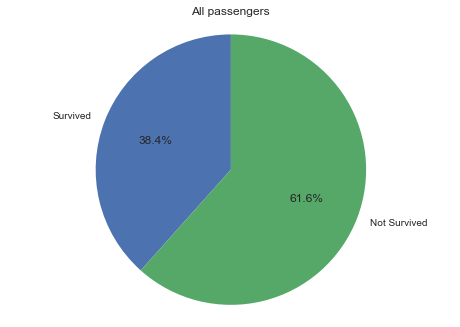

In [6]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
fig1, ax1 = plt.subplots()
labels = 'Survived', 'Not Survived'
sizes =[titanic.iloc[:,1].values.sum(), len(titanic)-titanic.iloc[:,1].values.sum()]
title='All passengers'
drawpie(ax1,labels,sizes,title) # user defined function

plt.show()

## Relation between Survival and Sex

Survived 74% of females and 19% of males. 63% of passangers from first class, 47% from second class and only 24% from third class. ** 96% of first class females were survived**. Pie chart shows, how many female and male survived in each class from total survived.

In [7]:
table = pd.pivot_table(data=titanic, values='PassengerId', index='Sex', columns='Survived', aggfunc='count')
print table

Survived    0    1
Sex               
female     81  233
male      468  109


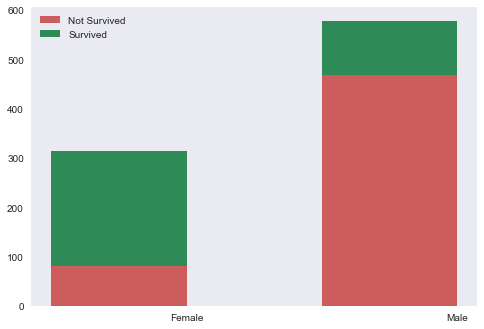

In [8]:
# Array with the non survivors, divided between male and female
bar_1 = table[0]
# Array with the survivors, divided between male and female
bar_2 = table[1]
# Range com a quantidade de itens das barras
x_pos = np.arange(len(bar_1))

first_bar = plt.bar(x_pos, bar_1, 0.5, color='indianred')
second_bar = plt.bar(x_pos, bar_2, 0.5,color='seagreen', bottom=bar_1)
# Definir position and labels for the X axis
plt.xticks(x_pos+0.25, ('Female','Male'))
plt.legend((first_bar, second_bar), ('Not Survived', 'Survived'))
plt.grid(False)
plt.show()


In [9]:
# Survived == 1 and  Not Survived == 0
# gives ratio of survived passanger in each class 
Class=titanic.groupby(['Pclass','Sex']).mean() 
print Class.head()['Survived']
Class=titanic.groupby(['Pclass']).mean() 
print Class.head()['Survived']
Class=titanic.groupby(['Sex']).mean() 
print Class.head()['Survived']

#print titanic.groupby(['Pclass','Sex']).sum()['Survived']/titanic.groupby(['Pclass','Sex']).mean()['Survived']-titanic.groupby(['Pclass','Sex']).sum()['Survived']

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
Name: Survived, dtype: float64
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


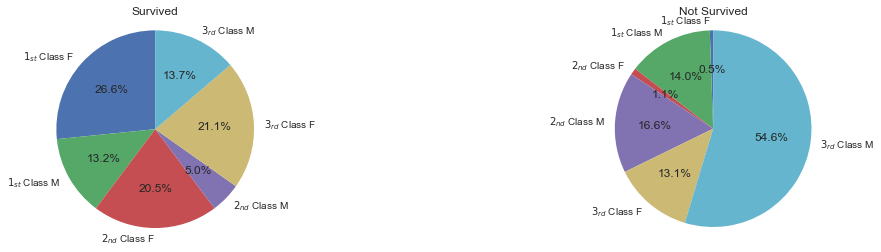

In [10]:
# Create the figure with one row and two columns. Figsize will define the figure size
fig, axes= plt.subplots(nrows=1, ncols=2, figsize=(15,4))

labels = '$1_{st}$ Class F', '$1_{st}$ Class M', '$2_{nd}$ Class F', '$2_{nd}$ Class M', '$3_{rd}$ Class F', '$3_{rd}$ Class M',

sizes_S = titanic.groupby(['Pclass','Sex']).sum()['Survived'] #survived
sizes = titanic.groupby(['Pclass','Sex']).count()['Survived']-titanic.groupby(['Pclass','Sex']).sum()['Survived'] #Not survived

drawpie(axes[0],labels,sizes_S,'Survived')
drawpie(axes[1],labels,sizes,'Not Survived')

# Adjust the space between the two charts
plt.subplots_adjust(wspace=1)

plt.show()

## Relation between Survival and Age

As a fact, there isn't existing age information for 177 (~20%) passangers. It can be repaced with some trash value, mean value or just remove these information.

In [11]:
titanic.loc[:,'Age'].isnull().sum()

177

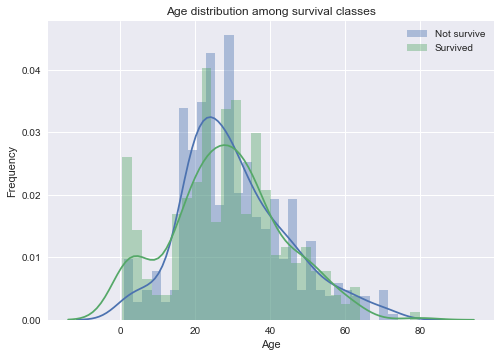

In [12]:
sns.distplot(titanic.loc[(titanic['Survived']==0) & (~titanic['Age'].isnull()),'Age'], bins=30)
sns.distplot(titanic.loc[(titanic['Survived']==1) & (~titanic['Age'].isnull()),'Age'], bins=30)
plt.title('Age distribution among survival classes')
plt.ylabel('Frequency')
plt.legend(['Not survive', 'Survived']);
plt.show()

In [13]:
#helping function for plotting bar charts
def drawbar(variables,Ylable,Title): 
    
    ## the data
    N = 3
    fig = plt.figure()
    ax = fig.add_subplot(111)
   
    ## necessary variables
    ind = np.arange(N)                # the x locations for the groups
    width = 0.2                      # the width of the bars

    ## the bars
    rects1S = ax.bar(ind, variables[0], width,
                    color='mediumblue'
                    )
    rects1 = ax.bar(ind+2*width, variables[1], width,
                    color='mediumblue', edgecolor='black', hatch="//"
                    )

    rects2S = ax.bar(ind+width, variables[2], width,
                        color='#d62728',
                       )
    rects2 = ax.bar(ind+3*width, variables[3], width,
                        color='#d62728', edgecolor='black', hatch="//"
                        )
    # axes and labels
    ax.set_xlim(-width,len(ind)+width)
    ax.set_ylabel(Ylable)
    ax.set_title(Title)
    xTickMarks = ['Class'+str(i) for i in range(1,4)]
    ax.set_xticks(ind+width)
    xtickNames = ax.set_xticklabels(xTickMarks)
    plt.setp(xtickNames, rotation=45, fontsize=15)

    ## add a legend
    ax.legend( (rects1S[0], rects2S[0],rects1[0], rects2[0]), ('Survived Males', 'Survived Females', 'Not survived Males', 'Not Survived Females') )
    

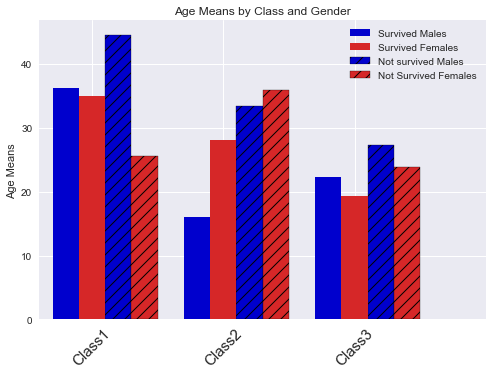

In [14]:
#Mean values of age in each class for each sex
age_mean=titanic.groupby(['Survived','Pclass','Sex']).mean()['Age']

variables=[age_mean[:, :, 'male'][1], #Survived Males
           age_mean[:, :, 'male'][0], # Not Survived Males
           age_mean[:, :, 'female'][1], #Survived Females
           age_mean[:, :, 'female'][0] #Not Survived Females
          ] 

Ylable='Age Means'
Title='Age Means by Class and Gender'

drawbar(variables,Ylable,Title) # user defined function

plt.show()

## Relation between Survival and Famili relation

Below shown ratio of survived passangers, as a function of number of relatives on board. From results below, can be concluded, **family relations could played role in survival,** as majority of survived people had 1 or two siblings.

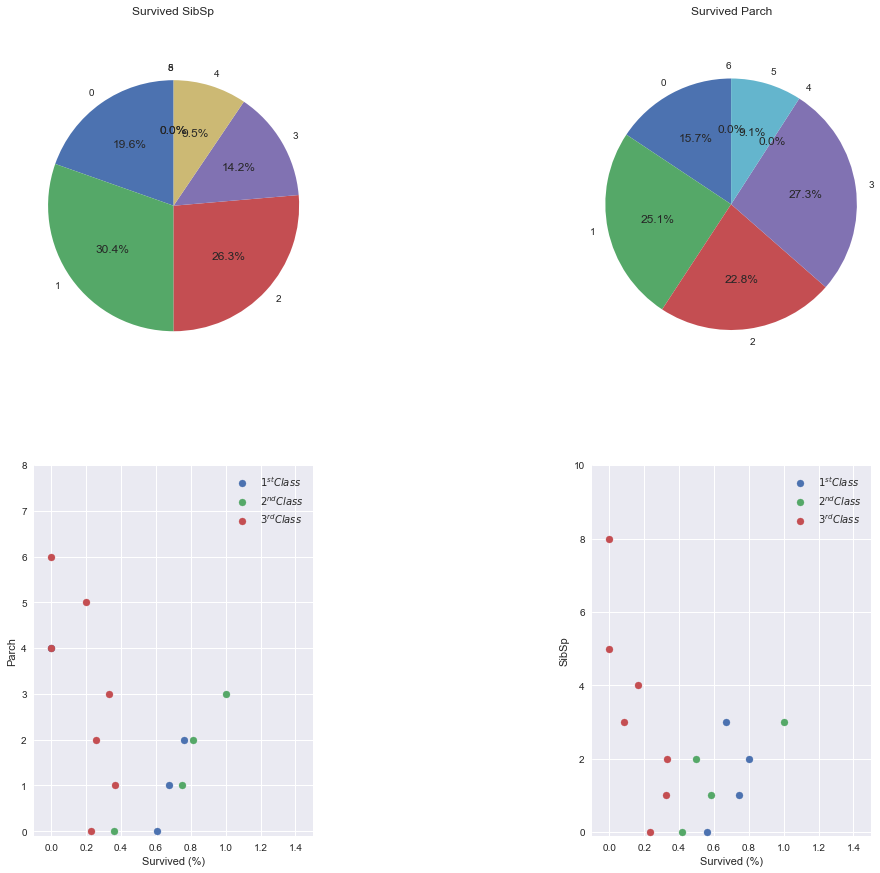

In [15]:
fare_mean=titanic.groupby(['SibSp']).mean()['Survived']
# Create the figure with one row and two columns. Figsize will define the figure size
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,15))
# Pie chart, where the slices will be ordered and plotted :
#ratio of survived in each case of SibSp
labels = '0', '1', '2', '3', '4', '5','8'
#sizes = titanic.groupby(['SibSp']).mean()['Survived']

# Create the pie chart on the first position with the given configurations
drawpie(axes[0][0],labels,titanic.groupby(['SibSp']).mean()['Survived'],'Survived SibSp')

#ratio of survived in each case of Parch
labels = '0', '1', '2', '3', '4', '5','6'
#sizes = titanic.groupby(['Parch']).mean()['Survived']

# Create the pie chart on the first position with the given configurations
drawpie(axes[0][1],labels,titanic.groupby(['Parch']).mean()['Survived'],'Survived Parch')


Class=['$1^{st} Class$', '$2^{nd} Class$', '$3^{rd} Class$']
# parch servived mean vs parch
class_par=titanic.groupby(['Pclass','Parch']).mean()['Survived']
class_Sib=titanic.groupby(['Pclass','Parch']).mean()['Survived']
axes[1][0].scatter(class_par[1],[0,1,2,4]) #first class
axes[1][0].scatter(class_par[2],[0,1,2,3]) #first class
axes[1][0].scatter(class_par[3],[0,1,2,3,4,5,6]) #first class
axes[1][0].legend(Class)
axes[1][0].set_xlabel('Survived (%)')
axes[1][0].set_xlim(-0.1,1.5)
axes[1][0].set_ylabel('Parch')
axes[1][0].set_ylim(-0.1,8)

# SibSp servived mean vs SibSp
class_par=titanic.groupby(['Pclass','SibSp']).mean()['Survived']
class_Sib=titanic.groupby(['Pclass','SibSp']).mean()['Survived']
axes[1][1].scatter(class_par[1],[0,1,2,3]) #first class
axes[1][1].scatter(class_par[2],[0,1,2,3]) #first class
axes[1][1].scatter(class_par[3],[0,1,2,3,4,5,8]) #first class
axes[1][1].legend(Class)
axes[1][1].set_xlabel('Survived (%)')
axes[1][1].set_xlim(-0.1,1.5)
axes[1][1].set_ylabel('SibSp')
axes[1][1].set_ylim(-0.1,10)
# Adjust the space between the two charts
plt.subplots_adjust(wspace=1)

plt.show()


## Relation between Survival and Fare paid

One thing could play role in survival could be fair, that passenger paid, but from results below it is not the case. The mean values of paid fare for survived and not survived passangers are almost same in each class.

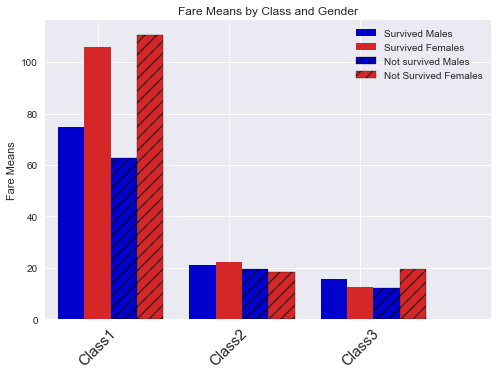

In [16]:
#Mean values of fare paid in each class for each sex
fare_mean=titanic.groupby(['Survived','Pclass','Sex']).mean()['Fare']

variables=[fare_mean[:, :, 'male'][1], #Survived Males
           fare_mean[:, :, 'male'][0], # Not Survived Males
           fare_mean[:, :, 'female'][1], #Survived Females
           fare_mean[:, :, 'female'][0] #Not Survived Females
          ] 

Ylable='Fare Means'
Title='Fare Means by Class and Gender'

drawbar(variables,Ylable,Title) # user defined function

plt.show()

# Conclusion

Data of 891 (40% of total) passangers was anlysed, but Titanic had an estimated 2,224 people on board. There isn't existing information about stuff working on Titanic. Also 20% of passanger age information is missing in our data file. 
To summarize results, the major aspects of survival was sex (female) and class (1 class), also passengers under age 10 had a prior. These results are only assumptions because the data is not full and has some missing information.